In [1]:
!pip install PyNomaly

  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-cp37-none-any.whl size=8498 sha256=45625c8e72ccbcce579b3a546cfcc522cf36ff133562939da648ea047e25e36b
  Stored in directory: /root/.cache/pip/wheels/68/c2/0d/3a90fb7928b539440db8e7a91ffaafe95dd1d3457c3454208c
Successfully built PyNomaly


In [2]:
import pandas as pd
import numpy as np
from PyNomaly import loop

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Statistics/master/Dataset/Q2Q3_input.csv')

In [4]:
m = loop.LocalOutlierProbability(data).fit()
scores = m.local_outlier_probabilities
print(scores[0:100])

[0.14981284490500235 0.3942167609941006 0.08508430538286058 0.0
 0.3290998766072213 0.0954634348357994 0.03539447604358235
 0.20692629110196026 0.022239805021906568 0.0 0.5361238051993744 0.0 0.0
 0.20837584197551964 0.0 0.11780349338925408 0.0 0.1665683855169209 0.0
 0.893533054442031 0.005542832200388801 0.014106166922037824 0.0
 0.43389059827946147 0.592222716936231 0.06044360936186737
 0.01243073101113592 0.029227865974314707 0.09962030996371048
 0.041550960491578755 0.17211186891774494 0.17328719411810936 0.0 0.0
 0.20036653031842314 0.2836684860968557 0.0806469146709986
 0.3899107144605708 0.12129868611949071 0.0 0.0 0.0 0.0
 0.18408988728773037 0.44276640778642695 0.03131218334115561
 0.3627443360078916 0.0 0.5709185072537655 0.0 0.0 0.060793909658075435
 0.0 0.0 0.0 0.0 0.26407632653964025 0.35642598020400074
 0.0765197840577717 0.09650641473371742 0.05121715922801521
 0.5600371664688721 0.6584457573514602 0.08103946066471217
 0.12406685765410153 0.44937046009914056 0.793693463

LocalOutlierProbability sets the extent (in integer in value of 1, 2, or 3) and n_neighbors (must be greater than 0) parameters with the default values of 3 and 10, respectively. You're free to set these parameters on your own as below:

In [6]:
from PyNomaly import loop
m = loop.LocalOutlierProbability(data, extent=2, n_neighbors=20).fit()
scores = m.local_outlier_probabilities
print(scores[0:50])

[0.15072205123144589 0.38723064848162053 0.19530795884950325
 0.09183580179968938 0.49737431559381684 0.0 0.0 0.2761803401921677 0.0
 0.0 0.773630463049179 0.0 0.0 0.4600044830973407 0.0 0.0 0.0
 0.1551357653409273 0.0 0.996545573532991 0.0 0.0 0.0 0.3758291004696847
 0.8498433855382895 0.1440303139415706 0.015218750285196222
 0.12607172905642794 0.0069578343758734 0.052602814240761124
 0.49252692594887526 0.3069203541793085 0.0 0.0 0.5549144120289479
 0.5889559673751529 0.0950632059540543 0.28908528099554903
 0.024616689322836578 0.0 0.0 0.0 0.0 0.06764899626079465
 0.6025063131669984 0.0 0.7361980535298063 0.0 0.3156534452673247 0.0]


This implementation of LoOP also includes an optional cluster_labels parameter. This is useful in cases where regions of varying density occur within the same set of data. When using cluster_labels, the Local Outlier Probability of a sample is calculated with respect to its cluster assignment.

In [7]:
from PyNomaly import loop
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples=50).fit(data)
m = loop.LocalOutlierProbability(data, extent=2, n_neighbors=20, cluster_labels=list(db.labels_)).fit()
scores = m.local_outlier_probabilities
print(scores[0:50])

[0.15072205123144589 0.38723064848162053 0.19530795884950325
 0.09183580179968938 0.49737431559381684 0.0 0.0 0.2761803401921677 0.0
 0.0 0.773630463049179 0.0 0.0 0.4600044830973407 0.0 0.0 0.0
 0.1551357653409273 0.0 0.996545573532991 0.0 0.0 0.0 0.3758291004696847
 0.8498433855382895 0.1440303139415706 0.015218750285196222
 0.12607172905642794 0.0069578343758734 0.052602814240761124
 0.49252692594887526 0.3069203541793085 0.0 0.0 0.5549144120289479
 0.5889559673751529 0.0950632059540543 0.28908528099554903
 0.024616689322836578 0.0 0.0 0.0 0.0 0.06764899626079465
 0.6025063131669984 0.0 0.7361980535298063 0.0 0.3156534452673247 0.0]


Utilizing Numba and Progress Bars
It may be helpful to use just-in-time (JIT) compilation in the cases where a lot of observations are scored. Numba, a JIT compiler for Python, may be used with PyNomaly by setting use_numba=True:

In [8]:
from PyNomaly import loop
m = loop.LocalOutlierProbability(data, extent=2, n_neighbors=20, use_numba=True, progress_bar=True).fit()
scores = m.local_outlier_probabilities
print(scores[0:50])

[ ======================================================================================= ] 100.00%[0.15072205123144589 0.38723064848162053 0.19530795884950325
 0.09183580179968938 0.49737431559381684 0.0 0.0 0.2761803401921677 0.0
 0.0 0.773630463049179 0.0 0.0 0.4600044830973407 0.0 0.0 0.0
 0.1551357653409273 0.0 0.996545573532991 0.0 0.0 0.0 0.3758291004696847
 0.8498433855382895 0.1440303139415706 0.015218750285196222
 0.12607172905642794 0.0069578343758734 0.052602814240761124
 0.49252692594887526 0.3069203541793085 0.0 0.0 0.5549144120289479
 0.5889559673751529 0.0950632059540543 0.28908528099554903
 0.024616689322836578 0.0 0.0 0.0 0.0 0.06764899626079465
 0.6025063131669984 0.0 0.7361980535298063 0.0 0.3156534452673247 0.0]


# Iris Data Example

We'll be using the well-known Iris dataset to show LoOP's capabilities. There's a few things you'll need for this example beyond the standard prerequisites listed above:

* matplotlib 2.0.0 or greater
* PyDataset 0.2.0 or greater
* scikit-learn 0.18.1 or greater<br>
First, let's import the packages and libraries we will need for this example.

In [10]:
!pip install PyNomaly
!pip install pydataset

     |████████████████████████████████| 15.9MB 210kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp37-none-any.whl size=15939431 sha256=7d02fac530aad8c00a46f45916afcff8c9848adb154094efbcae6adfff9cc53e
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset


In [11]:
from PyNomaly import loop
import pandas as pd
from pydataset import data
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

initiated datasets repo at: /root/.pydataset/


Now let's create two sets of Iris data for scoring; one with clustering and the other without.

In [12]:
# import the data and remove any non-numeric columns
iris = pd.DataFrame(data('iris'))
print(iris.head(6))
iris = pd.DataFrame(iris.drop('Species', 1))
iris.head(6)

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa
6           5.4          3.9           1.7          0.4  setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


Next, let's cluster the data using DBSCAN and generate two sets of scores. On both cases, we will use the default values for both extent (0.997) and n_neighbors (10).

In [19]:
db = DBSCAN(eps=0.9, min_samples=10).fit(iris)
m = loop.LocalOutlierProbability(iris).fit()
scores_noclust = m.local_outlier_probabilities
print('scores_noclust : ', scores_noclust[0:20])
m_clust = loop.LocalOutlierProbability(iris, cluster_labels=list(db.labels_)).fit()
scores_clust = m_clust.local_outlier_probabilities
print('scores_clust : ', scores_clust[0:20])

scores_noclust :  [0.0 0.0 0.0 0.0 0.0 0.031006905608042246 0.28990188753519186 0.0
 0.2590734235009943 0.0 0.0 0.06678407472486175 0.0 0.588763505192951
 0.37955459152929943 0.5852281242526426 0.08715664896359199 0.0
 0.2689972295251968 0.13993804084441994]
scores_clust :  [0.0 0.0 0.0 0.0 0.0 0.023382054826703517 0.22074024616128304 0.0
 0.1968679541677106 0.0 0.0 0.050381272386170864 0.0 0.4644687891804566
 0.2911493780732739 0.46138843637709026 0.06577354710626884 0.0
 0.2045364503249373 0.1057499955860779]


Organize the data into two separate Pandas DataFrames.

In [20]:
iris_clust = pd.DataFrame(iris.copy())
iris_clust['scores'] = scores_clust
iris_clust['labels'] = db.labels_
iris['scores'] = scores_noclust

In [23]:
iris_clust.sample(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,scores,labels
9,4.4,2.9,1.4,0.2,0.196868,0
148,6.5,3.0,5.2,2.0,0,1
117,6.5,3.0,5.5,1.8,0,1
46,4.8,3.0,1.4,0.3,0.00664516,0
149,6.2,3.4,5.4,2.3,0.117944,1
4,4.6,3.1,1.5,0.2,0,0
13,4.8,3.0,1.4,0.1,0,0
145,6.7,3.3,5.7,2.5,0,1
68,5.8,2.7,4.1,1.0,0.0991126,1
21,5.4,3.4,1.7,0.2,0.25978,0


In [24]:
iris.sample(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,scores
124,6.3,2.7,4.9,1.8,0
24,5.1,3.3,1.7,0.5,0.351621
82,5.5,2.4,3.7,1.0,0.0956033
128,6.1,3.0,4.9,1.8,0
48,4.6,3.2,1.4,0.2,0
103,7.1,3.0,5.9,2.1,0
71,5.9,3.2,4.8,1.8,0.0862775
49,5.3,3.7,1.5,0.2,0.0546054
110,7.2,3.6,6.1,2.5,0.286732
69,6.2,2.2,4.5,1.5,0.329777


And finally, let's visualize the scores provided by LoOP in both cases (with and without clustering).

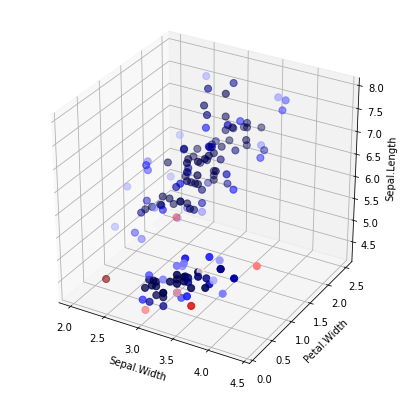

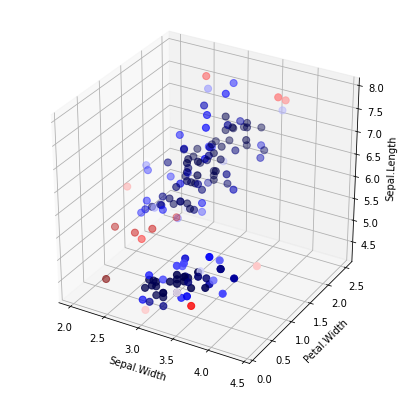

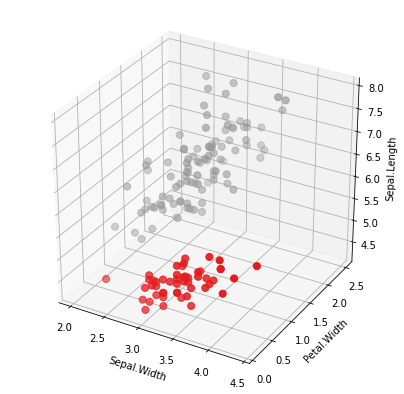

In [25]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['Sepal.Width'], iris['Petal.Width'], iris['Sepal.Length'],
c=iris['scores'], cmap='seismic', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
plt.show()
plt.clf()
plt.cla()
plt.close()

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_clust['Sepal.Width'], iris_clust['Petal.Width'], iris_clust['Sepal.Length'],
c=iris_clust['scores'], cmap='seismic', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
plt.show()
plt.clf()
plt.cla()
plt.close()


##Labels, just doing clustering
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_clust['Sepal.Width'], iris_clust['Petal.Width'], iris_clust['Sepal.Length'],
c=iris_clust['labels'], cmap='Set1', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
plt.show()
plt.clf()
plt.cla()
plt.close()

Note the differences between using LocalOutlierProbability with and without clustering. In the example without clustering, samples are scored according to the distribution of the entire data set. In the example with clustering, each sample is scored according to the distribution of each cluster. Which approach is suitable depends on the use case.


**NOTE**: Data was not normalized in this example, but it's probably a good idea to do so in practice.

# Using Numpy

In [26]:
data = np.array([
    [43.3, 30.2, 90.2],
    [62.9, 58.3, 49.3],
    [55.2, 56.2, 134.2],
    [48.6, 80.3, 50.3],
    [67.1, 60.0, 55.9],
    [421.5, 90.3, 50.0]
])
scores = loop.LocalOutlierProbability(data, n_neighbors=3).fit().local_outlier_probabilities
print(scores)

[0.007661247994256181 0.0 0.061338055574215185 0.005267973584346145 0.0
 0.5833927874624059]


# Specifying a Distance Matrix



PyNomaly provides the ability to specify a distance matrix so that any distance metric can be used (a neighbor index matrix must also be provided). This can be useful when wanting to use a distance other than the euclidean.

In [27]:
from sklearn.neighbors import NearestNeighbors

data = np.array([
    [43.3, 30.2, 90.2],
    [62.9, 58.3, 49.3],
    [55.2, 56.2, 134.2],
    [48.6, 80.3, 50.3],
    [67.1, 60.0, 55.9],
    [421.5, 90.3, 50.0]
])

In [28]:
neigh = NearestNeighbors(n_neighbors=3, metric='hamming')
neigh.fit(data)
d, idx = neigh.kneighbors(data, return_distance=True)

In [29]:
d, idx

(array([[0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]]), array([[0, 1, 2],
        [1, 0, 2],
        [2, 1, 0],
        [3, 1, 2],
        [4, 1, 2],
        [5, 1, 2]]))

In [30]:
m = loop.LocalOutlierProbability(distance_matrix=d, neighbor_matrix=idx, n_neighbors=3).fit()
scores = m.local_outlier_probabilities

The below visualization shows the results by a few known distance metrics:

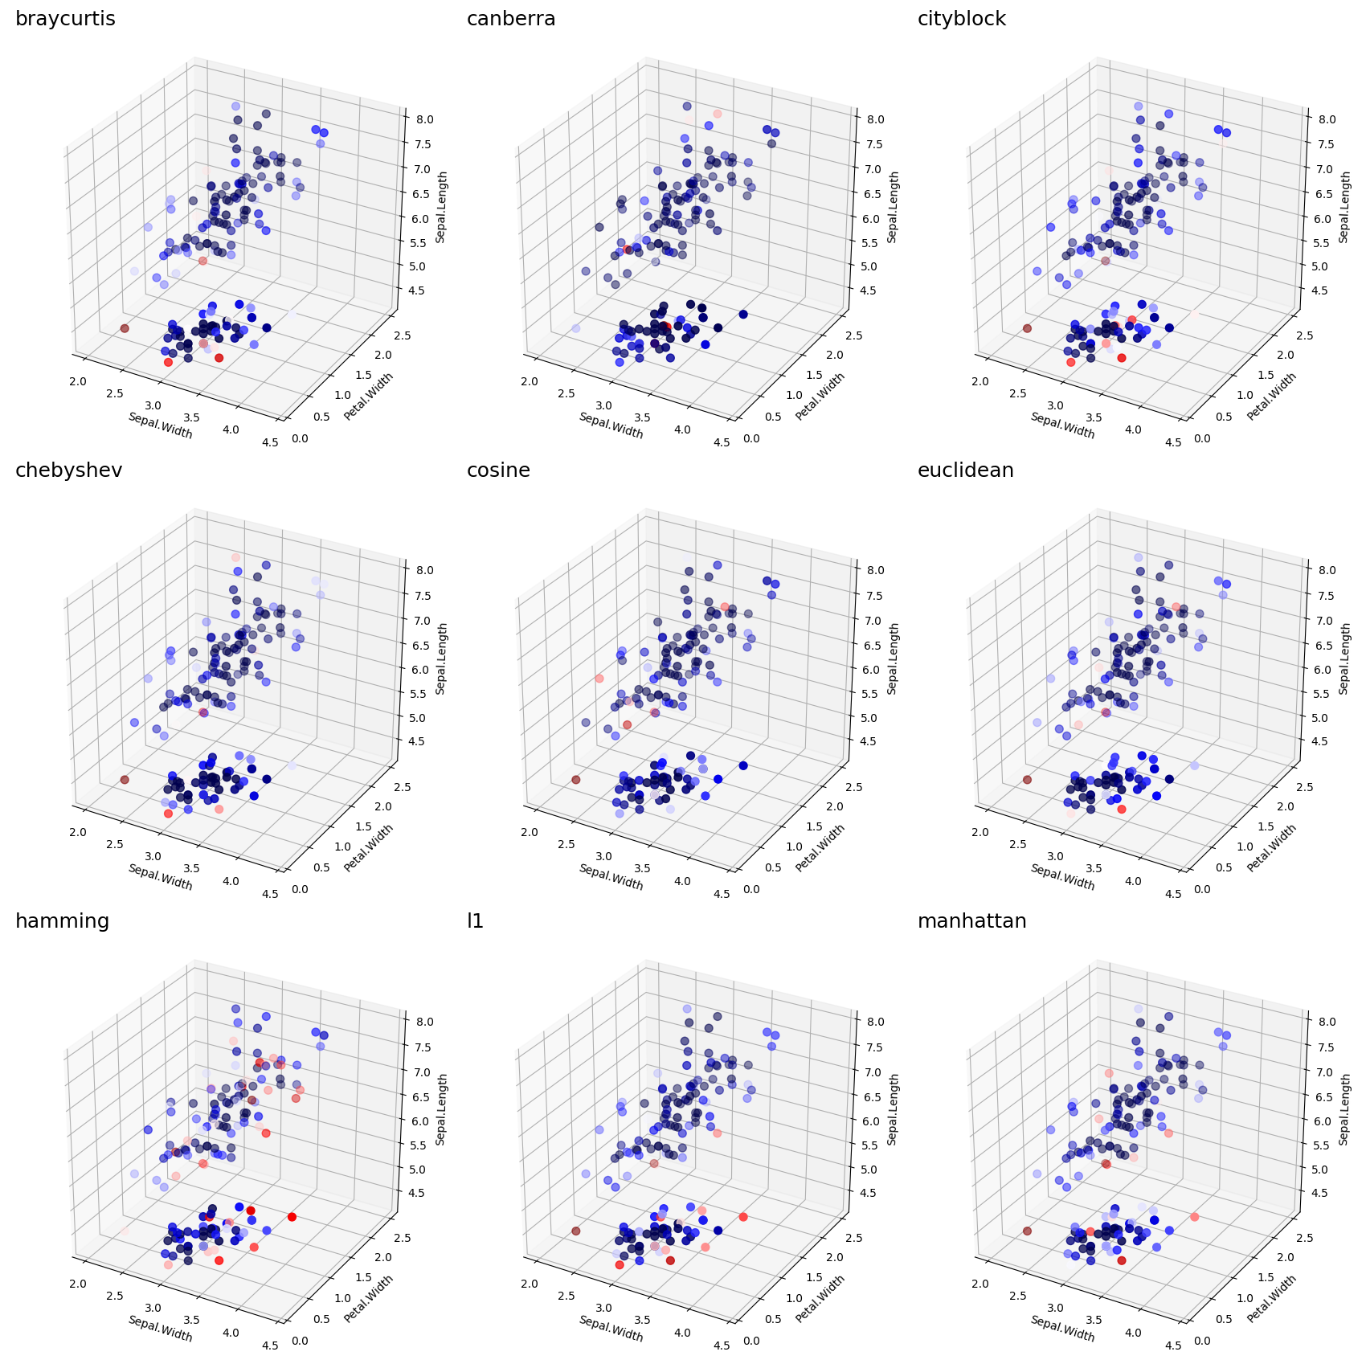

# Streaming Data







PyNomaly also contains an implementation of Hamlet et. al.'s modifications to the original LoOP approach [4], which may be used for applications involving streaming data or where rapid calculations may be necessary. First, the standard LoOP algorithm is used on "training" data, with certain attributes of the fitted data stored from the original LoOP approach. Then, as new points are considered, these fitted attributes are called when calculating the score of the incoming streaming data due to the use of averages from the initial fit, such as the use of a global value for the expected value of the probabilistic distance. Despite the potential for increased error when compared to the standard approach, it may be effective in streaming applications where refitting the standard approach over all points could be computationally expensive.

While the iris dataset is not streaming data, we'll use it in this example by taking the first 120 observations as training data and take the remaining 30 observations as a stream, scoring each observation individually.

Split the data.

In [1]:
!pip install PyNomaly
!pip install pydataset

In [2]:
from PyNomaly import loop
import pandas as pd
from pydataset import data
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
iris = pd.DataFrame(data('iris'))
iris = pd.DataFrame(iris.drop('Species', 1))
#print(iris.head())
iris = iris.sample(frac=1) # shuffle data
#print(iris.head())
iris_train = iris.iloc[:, 0:4].head(120)
iris_test = iris.iloc[:, 0:4].tail(30)

Fit to each set.

In [7]:
m = loop.LocalOutlierProbability(iris).fit()
scores_noclust = m.local_outlier_probabilities
iris['scores'] = scores_noclust

m_train = loop.LocalOutlierProbability(iris_train, n_neighbors=10)
m_train.fit()
iris_train_scores = m_train.local_outlier_probabilities

In [8]:
iris_test_scores = []
for index, row in iris_test.iterrows():
    array = np.array([row['Sepal.Length'], row['Sepal.Width'], row['Petal.Length'], row['Petal.Width']])
    iris_test_scores.append(m_train.stream(array))
iris_test_scores = np.array(iris_test_scores)

Concatenate the scores and assess.

In [9]:
iris['stream_scores'] = np.hstack((iris_train_scores, iris_test_scores))
# iris['scores'] from earlier example
rmse = np.sqrt(((iris['scores'] - iris['stream_scores']) ** 2).mean(axis=None))
print(rmse)

0.13966156804906002


The root mean squared error (RMSE) between the two approaches is approximately 0.199 (your scores will vary depending on the data and specification). The plot below shows the scores from the stream approach.

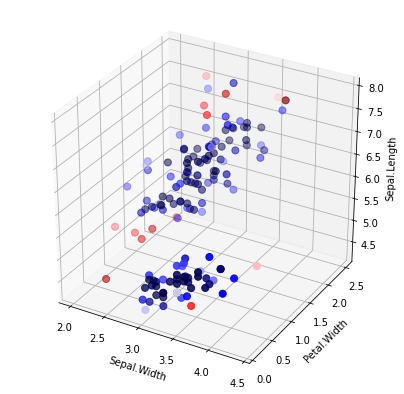

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['Sepal.Width'], iris['Petal.Width'], iris['Sepal.Length'],
c=iris['stream_scores'], cmap='seismic', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
plt.show()
plt.clf()
plt.cla()
plt.close()

**Notes**



When calculating the LoOP score of incoming data, the original fitted scores are not updated. In some applications, it may be beneficial to refit the data periodically. The stream functionality also assumes that either data or a distance matrix (or value) will be used across in both fitting and streaming, with no changes in specification between steps.